In [24]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr
import os


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
data_dir = "./nctiles_monthly/"
time_slice = np.arange(0,288)

oceFWflx = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"oceFWflx",time_slice,rename_indices=True)
oceQnet = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"oceQnet",time_slice,rename_indices=True)

Loaded oceFWflx over time slice  

Loaded oceQnet over time slice  



In [26]:
print(oceQnet)

<xarray.Dataset>
Dimensions:  (i: 90, j: 90, tile: 13, time: 288)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 285.0 286.0 287.0 288.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    tim      (time) datetime64[ns] 1992-01-16 1992-02-16 ... 2015-12-16
    lon      (tile, j, i) float64 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    lat      (tile, j, i) float64 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
Dimensions without coordinates: tile
Data variables:
    oceQnet  (tile, time, j, i) float64 nan nan nan nan nan ... nan nan nan nan
    timstep  (tile, time) float64 732.0 1.428e+03 ... 2.096e+05 2.104e+05
    land     (tile, j, i) float64 nan nan nan nan nan ... nan nan nan nan nan
    area     (tile, j, i) float64 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
Attributes:
    description:    oceQnet -- ECCO v4 ocean state estimate, release 3 -- 199...
  

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

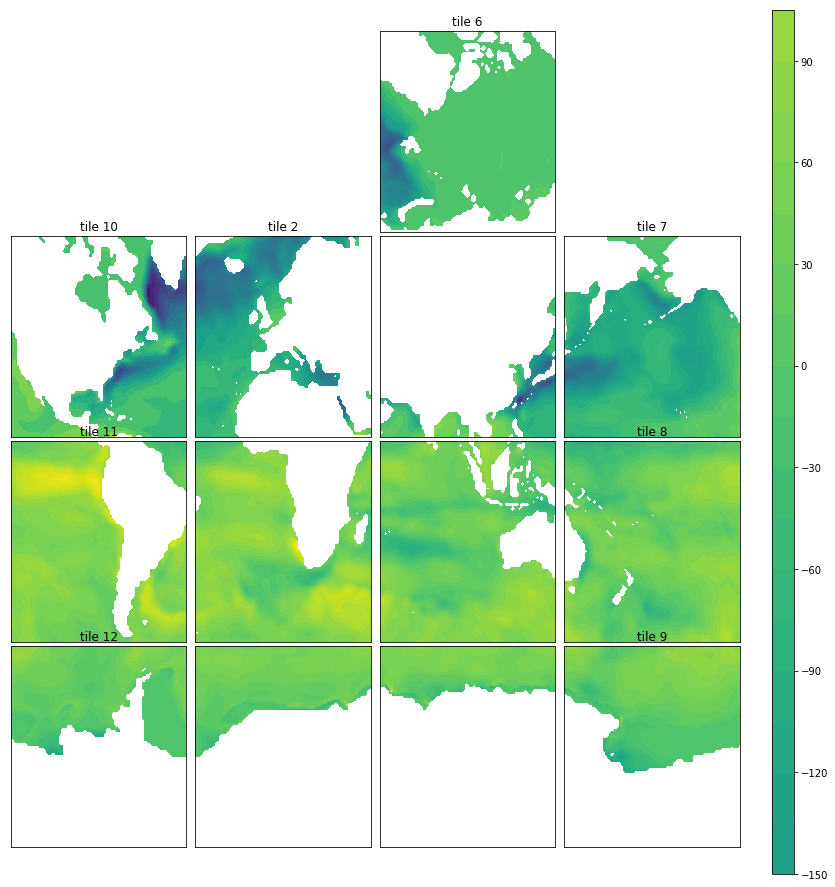

In [31]:
#plotting_functions.world_plot(oceFWflx.oceFWflx.isel(time=0))
plotting_functions.world_plot(oceQnet.oceQnet.isel(time=1))